## Walmart Dataset Retail

The dataset was taken from Kaggle. Link - https://www.kaggle.com/rutuspatel/walmart-dataset-retail

Author of this dataset is Kaggle user Rutu Patel.

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. 45 Walmart stores located in different regions.

### Introduction

In [1]:
#import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

walmart = pd.read_csv('Walmart_Store_sales.csv')
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [2]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
walmart.shape

(6435, 8)

The author suggests several questions of descriptive statistics. I will provide my solutions and additional researches a bit.
Also i'll try to use my own knowledges in basic machine learning to predict the sales. The resulting algorithm will have to consider such factors factors like economic conditions including CPI, Unemployment Index, etc.

1) Which store has maximum sales

2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3) Which store/s has good quarterly growth rate in Q3’2012

4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

### Which store has maximum sales?

We will find the stores with the highest and lowest sales using grouping and aggregate functions. After that, we will build a sales schedule for stores.

In [4]:
walmart.groupby('Store')['Weekly_Sales'].agg(np.sum).sort_values(ascending=False).head(5)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

The store with maximum sales is store with number ***20***.

In [5]:
walmart.groupby('Store')['Weekly_Sales'].agg(np.sum).sort_values(ascending=False).tail(5)

Store
38    55159626.42
36    53412214.97
5     45475688.90
44    43293087.84
33    37160221.96
Name: Weekly_Sales, dtype: float64

The store with minimum sales is store with number **33**.

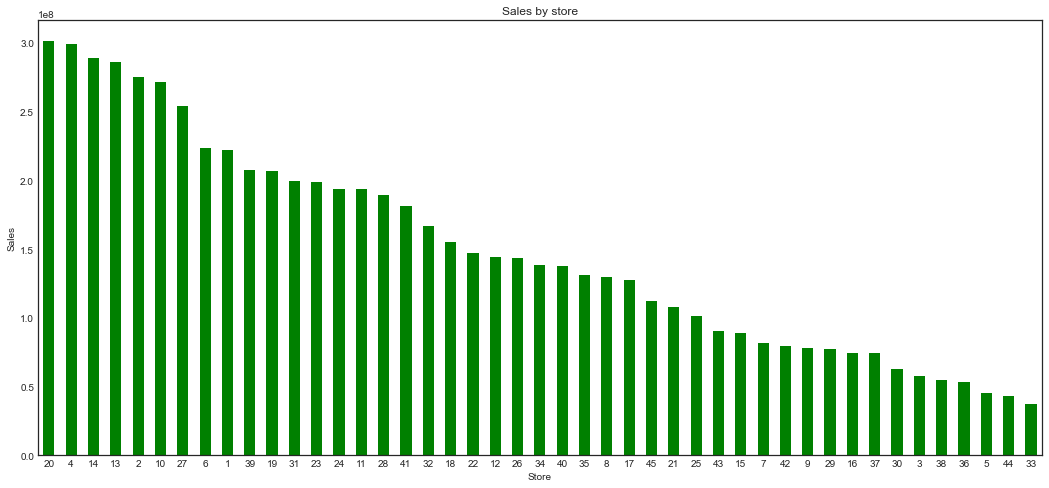

In [6]:
#create the plot with total sales by every store

sales_by_store = walmart.groupby('Store')['Weekly_Sales'].agg(np.sum).sort_values(ascending=False)

style.use('seaborn-white')
plt.figure(figsize=(18,8))
sales_by_store.plot(kind='bar', color='green')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.xticks(rotation=0)
plt.title('Sales by store')
plt.show()

### Maximum standard deviation

Which store has maximum standard deviation? i.e. the sales vary a lot. Also, find out the coefficient of mean to standard deviation.

In [7]:
#find the store with maximum std on groupby method

walmart.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False).head()

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

***The store with maximum standard deviation is 14 store with value 317569.95***

In [8]:
#find the coefficient

coefficient = walmart.groupby('Store')['Weekly_Sales'].std() / walmart.groupby('Store')['Weekly_Sales'].mean()
coefficient.sort_values(ascending=False).head()

Store
35    0.229681
7     0.197305
15    0.193384
29    0.183742
23    0.179721
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Coefficient of mean to standard deviation by every store')

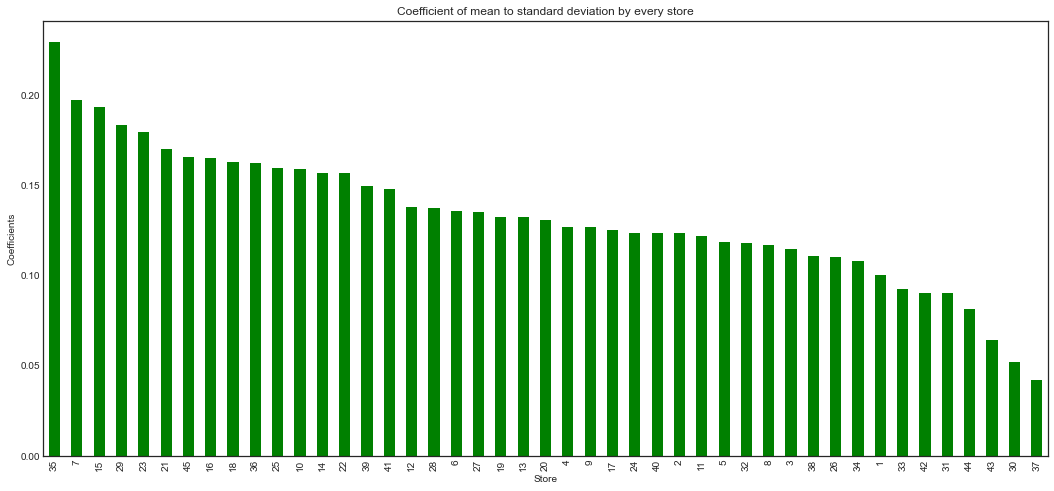

In [9]:
#create the plot

style.use('seaborn-white')
plt.figure(figsize=(18,8))
coefficient.sort_values(ascending=False).plot(kind='bar', color='green')
plt.xlabel('Store')
plt.ylabel('Coefficients')
plt.title('Coefficient of mean to standard deviation by every store')

### Good quarterly growth rate in Q3’2012

Which store/s has good quarterly growth rate in Q3’2012?

We'll find the difference between store performance for the second and third quarter. Next we see how different the income was in percentage terms and build evaluative plots.

In [24]:
#change the date type

walmart['Date'] = pd.to_datetime(walmart['Date'])
walmart.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
month                    int64
year                     int64
quarter                  int64
dtype: object

In [12]:
walmart2012_2d = walmart[(walmart['Date'] >= '2012-04-01') & (walmart['Date'] <= '2012-06-30')]
walmart2012_3d = walmart[(walmart['Date'] >= '2012-07-01') & (walmart['Date'] <= '2012-09-30')]

sales2d = walmart2012_2d.groupby('Store', as_index=False)['Weekly_Sales'].sum()
sales3d = walmart2012_3d.groupby('Store', as_index=False)['Weekly_Sales'].sum()

In [13]:
#create a table with 2d and 3d quarters results and their contrast

sales2012 = sales2d.merge(sales3d, how='inner', on='Store')
sales2012 = sales2012.rename({'Weekly_Sales_x':'2d', 'Weekly_Sales_y':'3d'}, axis='columns')
sales2012['diff'] = sales2012['3d']-sales2012['2d']
sales2012['rate'] = (sales2012['diff']/sales2012['2d']) * 100
y_sales2012 = sales2012.loc[:, ['rate']]
sales2012['z-rate'] = (y_sales2012 - y_sales2012.mean())/y_sales2012.std()
sales2012['rate-colors'] = ['red' if y_sales2012 < 0 else 'green' for y_sales2012 in sales2012['z-rate']]
sales2012.head()

,Store,2d,3d,diff,rate,z-rate,rate-colors
0,1,21036965.58,18633209.98,-2403755.60,-11.426342,-0.626920,red
1,2,25085123.61,22396867.61,-2688256.00,-10.716535,-0.355388,red
2,3,5562668.16,4966495.93,-596172.23,-10.717379,-0.355711,red
3,4,28384185.16,25652119.35,-2732065.81,-9.625310,0.062054,green
4,5,4427262.21,3880621.88,-546640.33,-12.347142,-0.979167,red


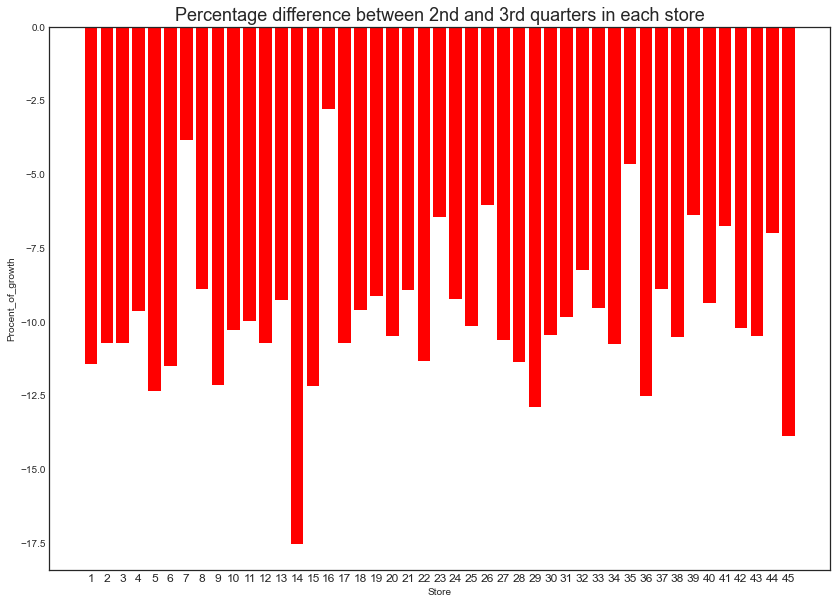

In [14]:
#make a plot with a procent rate of growth

plt.figure(figsize=(14,10))
plt.bar(sales2012.Store, sales2012.rate, color='r')
plt.ylabel('Procent_of_growth')
plt.xlabel('Store')
plt.xticks(sales2012.Store, fontsize=12)
plt.title('Percentage difference between 2nd and 3rd quarters in each store', size=18)
plt.show()

As we can see all sales were falling in the third quarter.

The biggest decrease occured in ***14 store***. 

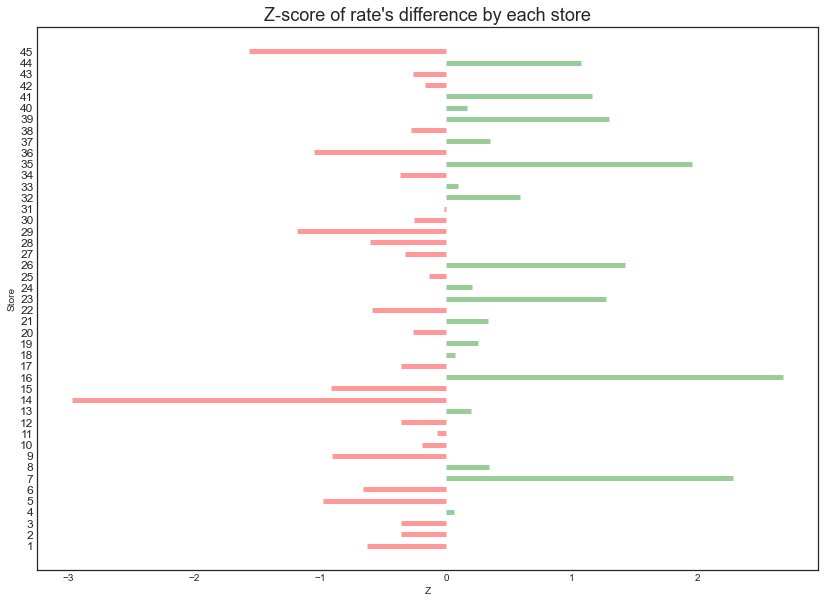

In [15]:
#create a plot for z-score

plt.figure(figsize=(14,10))
plt.hlines(y=sales2012.Store, xmin=0, xmax=sales2012['z-rate'], color=sales2012['rate-colors'], alpha=0.4, linewidth=5)
plt.yticks(sales2012.Store, fontsize=12)
plt.xlabel('Z')
plt.ylabel('Store')
plt.title("Z-score of rate's difference by each store", size=18)
plt.show()

### Holidays

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

Let's select the holiday dates present in the dataset, create a function to find the average sales values on holidays, then find the average sales value on working days and compare the values.

Since our data is limited to October 2012, the data will not be symmetrical - the averages for Thanksgiving and Christmas will consist of only two indicators.

In [16]:
#define the holidays in dataset

holidays = {'Super_Bowl': ['12-2-2010', '11-2-2011', '10-2-2012'],
'Labour_Day':['10-9-2010', '9-9-2011', '7-9-2012'],
'Thanksgiving':['26-11-2010', '25-11-2011'],
'Christmas':['31-12-2010', '30-12-2011']
           }

In [17]:
walmart[walmart.Holiday_Flag == 1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424


In [18]:
#create the function for iteration all the data

def holidays_sales(days):
    means = {}
    m = []
    for i,k in days.items():
        for j in k:
            x = walmart[walmart['Date'] == j]['Weekly_Sales'].mean()
            m.append(x)
            mean = np.average(m)
        means[i] = mean
    return means
        
hol_sale = holidays_sales(holidays) 
hol_sale

{'Super_Bowl': 1079127.987703704,
 'Labour_Day': 1060777.640814815,
 'Thanksgiving': 1163401.5875555556,
 'Christmas': 1122887.8923555557}

In [19]:
#find the mean value of non_holidays sales
non_holidays_sales = walmart[walmart.Holiday_Flag == 0]['Weekly_Sales'].mean()
print('Mean values of non_holidays_sales equal {}'.format(round(non_holidays_sales,2)))

Mean values of non_holidays_sales equal 1041256.38


[]

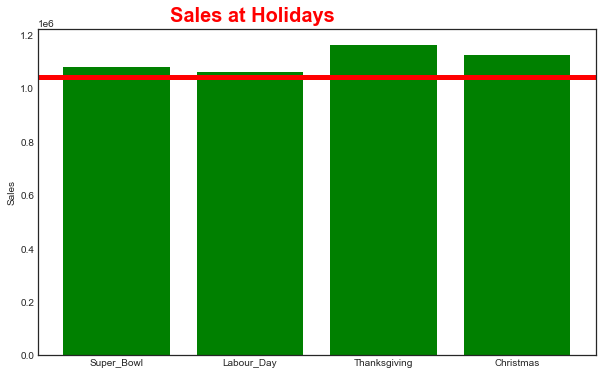

In [20]:
#create the plot
style.use('seaborn-white')
plt.figure(figsize=(10,6))
plt.bar(hol_sale.keys(), hol_sale.values(), color='g')
plt.axhline(y=non_holidays_sales, color = 'r', linewidth=5)
plt.ylabel('Sales')
plt.text(x=0.4, y = 1250000, s='Sales at Holidays', color='red', size=20, weight='bold')
plt.plot()

### Find the months sales by store

Let's find the average sales by month. For that we will allocate months and years into separate columns, then create a function and a cycle that will help us to demonstrate average sales by month for all stores.

This part doesn't show 2012 year, cause the data which presented in the dataset is not complete.

In [21]:
#initiate the date series

walmart['month'] = walmart['Date'].dt.month
walmart['year'] = walmart['Date'].dt.year
walmart['quarter'] = walmart['Date'].dt.quarter

mean_sales = walmart.Weekly_Sales.mean()
mean_sales

1046964.8775617715

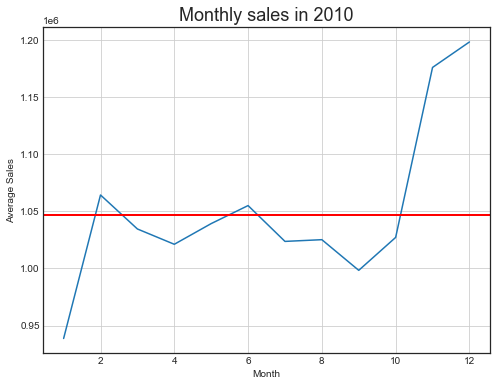

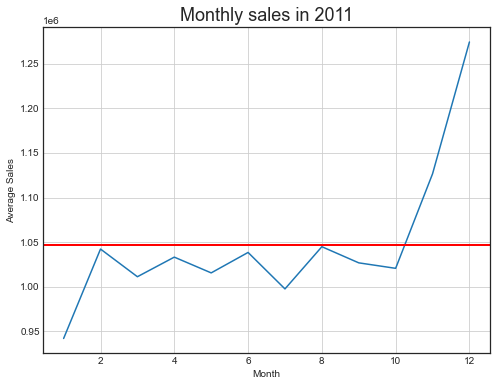

In [22]:
#create the function for plots by years

def walmart_month(y):
    month_mean = walmart[walmart.year == y].groupby('month').mean()['Weekly_Sales']
    return month_mean

years = [2010, 2011]

for i in years:
    wm = walmart_month(i)
    style.use('seaborn-white')
    plt.figure(figsize=(8,6))
    plt.plot(wm.index, wm.values)
    plt.title('Monthly sales in ' + str(i), size=18)
    plt.ylabel('Average Sales')
    plt.xlabel('Month')
    plt.grid(True)
    plt.axhline(y=mean_sales, color = 'r', linewidth=2)
    plt.show()

According to the plots, we see that in 2010 and 2011, the main peak of consumer activity occurred in the ***last months*** of the year. Traditionally, January turned out to be the worst month for sales.

The main reasons for this are the concentration of holidays at the end of the calendar year, as well as the abundance of discount promotions.

***June*** shows itself best among other monthes, always exceeding the spring indicators.

Lets show on the quarter plots.

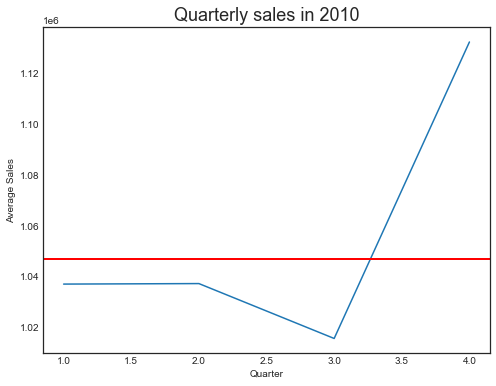

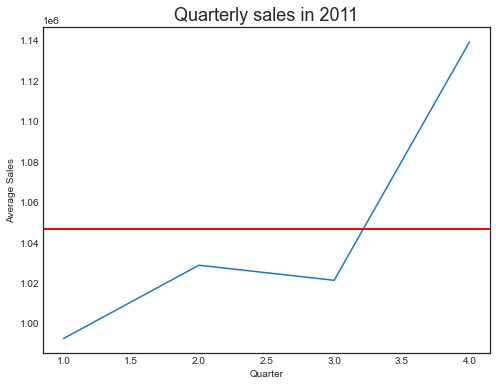

In [23]:
#create the function for plots by years

def walmart_quarter(y):
    quarter_mean = walmart[walmart.year == y].groupby('quarter').mean()['Weekly_Sales']
    return quarter_mean

years = [2010, 2011]

for i in years:
    wm = walmart_quarter(i)
    style.use('seaborn-white')
    plt.figure(figsize=(8,6))
    plt.plot(wm.index, wm.values)
    plt.title('Quarterly sales in ' + str(i), size=18)
    plt.ylabel('Average Sales')
    plt.xlabel('Quarter')
    plt.axhline(y=mean_sales, color = 'r', linewidth=2)
    plt.show()

The plots look similar. The difference is only in the angle of fall or rise.

 ### Next we will start a ML process.